In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os,glob


In [2]:
def load(file):
    with open(file,encoding='utf-8') as infile:
        inside=json.load(infile)
    return inside
def save(file,obj):
    with open(file, 'w') as outfile:
        json.dump(obj, outfile)
import math
def rotate(xy, theta):
    # https://en.wikipedia.org/wiki/Rotation_matrix#In_two_dimensions
    cos_theta, sin_theta = math.cos(theta), math.sin(theta)

    return (
        xy[0] * cos_theta - xy[1] * sin_theta,
        xy[0] * sin_theta + xy[1] * cos_theta
    )
def translate(xy, offset):
    return xy[0] + offset[0], xy[1] + offset[1]

def tag_angle(x1,y1,x2,y2):
    #angle in radians
    dx = x1-x2
    dy = y1-y2 
    norm = np.sqrt(dx**2+dy**2)
    up = [dx/norm,dy/norm]
    angle= np.arctan2(up[0], -up[1])#/np.pi*180    
    return angle
def bbox(head,abdomen,size=[90,150]):
    rectangle=[(-size[0],size[1]),(-size[0],-size[1]),(size[0],-size[1]),(size[0],size[1])]

    theta=tag_angle(head[0],head[1],abdomen[0],abdomen[1])
    offset=((head[0]+abdomen[0])/2.,(abdomen[1]+head[1])/2.)

    return [translate(rotate(xy, theta), offset) for xy in rectangle]
    

# Extracting images

In [3]:
label_annotations = load('C01_190722120000-2052_103235_Tracks.json')
annot= label_annotations['data']

In [4]:
# annot

In [5]:
path_video = '/mnt/storage/Gurabo/videos/gurabo10/mp4/C01/C01_190722120000.mp4'
video = cv2.VideoCapture(path_video)
output_folder = 'images/'
output_folder_training = os.path.join(output_folder,'training')
output_folder_testing = os.path.join(output_folder,'testing')
os.makedirs(output_folder,exist_ok=True)
os.makedirs(output_folder_training,exist_ok=True)
os.makedirs(output_folder_testing,exist_ok=True)
training_flag = 0
not_extracted = []
train_indexes=[]
test_indexes =[]
for f,frame in enumerate(annot.keys()):
    video.set(cv2.CAP_PROP_POS_FRAMES,int(frame))
    t,im=video.read()
    if t == False:
        print('%s not extracted'%frame)
        not_extracted.append(frame)
        continue 
    if f < training_flag+1:
        file_name = os.path.join(output_folder_training,'%012d.jpg'%int(frame))
        train_indexes.append(frame)
        cv2.imwrite(file_name,im)
    else: 
        file_name = os.path.join(output_folder_testing,'%012d.jpg'%int(frame))
        cv2.imwrite(file_name,im)
        test_indexes.append(frame)
        
        


# Create File 

In [6]:
indexes = list(annot.keys())

In [7]:
keypoints = [l['label'] for l in  annot[indexes[0]][0]['parts']]
skeleton = [[1,0],[2,0],[0,6],[6,3],[3,5],[5,4]]

In [8]:
keypoints

['head', 'antL', 'antR', 'thorax', 'abdomen', 'th-ab', 'hd-th']

In [9]:
keypoints = ["head", "hd-th", "thorax", "th-ab", "abdomen"]
skeleton = [[1,2],[2, 3],[3,4],[4,5]]

In [10]:
# # For multiple files
# year = 2019
# date = 'DEC-2019'
# # keypoints = ['head','thorax','tail','antL','antR','pollenL','pollenR','tag']

# # skeleton = [[1,0],[2,0],[0,6],[6,3],[3,5],[5,4]]
# categories= [{'name':'bee',
#               'super_category':'bee',
#               'id':1,
#               'keypoints':keypoints,'skeleton':skeleton}]
# file={}
# file['images']=[]
# file['info']={}
# file['annotations']=[]
# file['categories']=[]
# file['categories']=categories 
# file['info']=label_annotations['info']
# file['info']['Date_created']=date
# file['info']['year']=year
# counter = 0
# id_counter =0 
# for f in annot_files:
#     print(f)
#     label_annotations = load(f)
#     if 'data' not in label_annotations:
#         print('problem with file,',f)
#         continue 
#     annot= label_annotations['data']
#     indexes = list(annot.keys())
#     for k in indexes:
#         if k in not_extracted:
#             print(k,'not extracted')
#             continue
#         counter +=1
#         name= counter
#         file['images'].append({'filename':'%012d.jpg'%int(name),'id':int(name),'height':1440,'width':2560})
        
#         for j,an in enumerate(annot[k]):
#             id_counter +=1
#             keypart={"head":    [1,1,0],
#                      "thorax":  [1,1,0],
#                      "abdomen": [1,1,0],
#                      "antL":    [1,1,0],
#                      "antR":    [1,1,0],
#                      "pollenL": [1,1,0],
#                      "pollenR": [1,1,0],
#                      "tag":     [1,1,0]
#                     }
#             if 'parts' not in an:
#                 print('not parts labeled in this annotation')
#                 print(f,k)
#                 continue
#             for p in an['parts']:
#                 x = p['posFrame']['x']
#                 y = p['posFrame']['y']
#                 keypart[p['label']] = [x,y,1]
                
#             if keypart['head'][0] == 1:
#                 continue
#             if keypart['abdomen'][0] == 1:
#                 continue
#             body={}
#             body['area']=250*300
#             box= bbox((keypart['head'][0],keypart['head'][1]),(keypart['abdomen'][0],keypart['abdomen'][1]),size =[250,300])
#             fbox =[]
#             for b in box:
#                 if b[0]<0:
#                     fbox.append(1)
#                 else:
#                     fbox.append(b[0])
#                 if b[1]<0:
#                     fbox.append(1)
#                 else:
#                     fbox.append(b[1])
            
#             body['bbox']=fbox
#             body['category_id']=1
#             body['image_id']= int(name)
#             body['id']=int(id_counter)
#             body['iscrowd'] =0
#             hd =keypart["head"]
#             th =  keypart["thorax"]
#             ab = keypart["abdomen"]
#             antL = keypart["antL"]
#             antR = keypart["antR"]
#             pR = keypart["pollenL"]
#             pL =keypart["pollenR"]
#             tg =keypart["tag"]
#             body['keypoints']=[hd[0],hd[1],hd[2],
#                                th[0],th[1],th[2],
#                                ab[0],ab[1],ab[2],
#                                antL[0],antL[1],antL[2],
#                               antR[0],antR[1],antR[2],
#                                pL[0],pL[1],pL[2],
#                               pR[0],pR[1],pR[2],
#                               tg[0],tg[1],tg[2]]
#             body['num_keypoints']=len(keypart)
#             body['segmentation']=[body['bbox']]
#             file['annotations'].append(body)

In [11]:
# body['num_keypoints']

In [12]:
# output_file =os.path.join(output_folder,'tag_pollen_bee_annotations_final.json')
# save(output_file,file)

In [13]:
# im=cv2.imread(os.path.join('BEES/Tag_Pollen/raw/',file['images'][4]['filename']))

In [14]:
# plt.imshow(im)
# for ann in file['annotations']:
#     if ann['image_id']==5:
#         if ann['keypoints'][-4]==0:
#             continue
#         print(ann)
#         #for i in range(0,len(ann['keypoints']),3):
#         plt.plot(ann['keypoints'][3*5],ann['keypoints'][3*5+1],'o')

# For just one file

In [15]:
indexes = test_indexes
year = 2019
date = 'DIC-2019'
# keypoints = [l['label'] for l in  annot[indexes[0]][0]['parts']]
skeleton = [[1,2],[2,3],[3,4],[4,5]]
categories= [{'name':'bee',
              'super_category':'animal',
              'id':1,
              'keypoints':keypoints,'skeleton':skeleton}]
file={}
file['images']=[]
file['info']={}
file['annotations']=[]
file['categories']=[]
file['categories']=categories 
file['info']=label_annotations['info']
file['info']['Date_created']=date
file['info']['year']=year
images_ids = []
id_counter =0 

body_parts = ["head", "hd-th", "thorax", "th-ab", "abdomen"]

# keypoints = ['head', 'thorax', 'abdomen', 'antL', 'antR', 'pollenL', 'pollenR','tag']
for k in indexes:
    if k in not_extracted:
        continue
    name= k
    
    for j,an in enumerate(annot[k]):
        id_counter +=1
        keypart=[]
        bbox_points = dict()
        if 'parts' not in an:
            continue
        
        body_parts_present = []
        
        
        ##########
        for part in body_parts:
            for annotated_part in an["parts"]:
                if annotated_part["label"] == part:
                    body_parts_present.append(part)
                    
                    x = annotated_part['posFrame']['x']
                    y = annotated_part['posFrame']['y']
                    
                    if part == "head":
                        bbox_points["head"] = (x, y)
                    if part == "abdomen":
                        bbox_points["abdomen"] = (x, y)

                    keypart.append(int(x))
                    keypart.append(int(y))
                    keypart.append(1)
                    
        ##########
            
#         for p in an['parts']:
#             if p["label"] not in body_parts:
#                 continue
#             else:
#                 body_parts_present.append(p["label"])
            
#             x = p['posFrame']['x']
#             y= p['posFrame']['y']
            
#             if p["label"] == "head":
#                 bbox_points["head"] = (x, y)
#             if p["label"] == "abdomen":
#                 bbox_points["abdomen"] = (x, y)
                
#             keypart.append(x)
#             keypart.append(y)
#             keypart.append(2)
        body={}
        body['area']=400*300
        print(keypart, name)
        
        if len(body_parts_present) != len(body_parts):
            continue
#         if("head" not in bbox_points or "abdomen" not in bbox_points):
#             continue
        box=bbox(bbox_points["head"],bbox_points["abdomen"], size=[200, 300])
        fbox =[]
        for b in box:
            if b[0]<0:
                fbox.append(1)
            else:
                fbox.append(int(b[0]))
            if b[1]<0:
                fbox.append(1)
            else:
                fbox.append(int(b[1]))
            
        body['bbox']=fbox
        #body['bbox']=
        body['category_id']=1
        body['image_id']= int(name)
        body['id']=int(id_counter)
        body['iscrowd'] =0
        body['keypoints']=keypart
        body['num_keypoints']=len(keypart)
        body['segmentation']=[body['bbox']]
        
        
        file['annotations'].append(body)
        if int(name) not in images_ids:
            file['images'].append({'file_name':'%012d.jpg'%int(name),'id':int(name),'height':1440,'width':2560})
            images_ids.append(int(name))
        

[2049, 1091, 1, 2004, 1121, 1, 1940, 1149, 1, 1879, 1184, 1, 1641, 1278, 1] 4202
[584, 310, 1, 621, 359, 1, 659, 421, 1, 705, 503, 1, 815, 710, 1] 4202
[1983, 692, 1, 2004, 604, 1, 2031, 541, 1, 2048, 479, 1, 2108, 282, 1] 4668
[1188, 571, 1, 1164, 643, 1, 1130, 709, 1, 1090, 769, 1, 992, 951, 1] 4668
[1236, 923, 1, 1326, 973, 1, 1376, 993, 1, 1442, 1013, 1, 1614, 1013, 1] 4668
[1814, 859, 1, 1834, 923, 1, 1850, 987, 1, 1869, 1062, 1, 1918, 1254, 1] 7922
[1563, 702, 1, 1509, 678, 1, 1445, 674, 1, 1353, 662, 1, 1143, 674, 1] 7922
[1913, 508, 1, 1951, 456, 1, 2011, 394, 1, 2055, 330, 1, 2197, 186, 1] 7922
[1334, 58, 1, 1298, 86, 1, 1248, 128, 1, 1186, 188, 1, 1030, 374, 1] 7922
[1339, 513, 1, 1357, 576, 1, 1366, 660, 1, 1385, 726, 1, 1434, 920, 1] 11127
[1965, 853, 1, 2007, 891, 1, 2042, 937, 1, 2101, 1008, 1, 2187, 1188, 1] 12714
[1627, 466, 1, 1635, 519, 1, 1647, 571, 1, 1653, 678, 1, 1673, 869, 1] 12714
[1389, 88, 1, 1406, 144, 1, 1416, 193, 1, 1437, 292, 1, 1444, 498, 1] 12714
[771, 

In [16]:
len([an['image_id'] for an in file['annotations']]), len(file['images'])

(47, 16)

In [17]:
output_file =os.path.join(output_folder,'test_annotations.json')
save(output_file,file)

In [14]:
file["images"]

[{'file_name': '000000004202.jpg', 'id': 4202, 'height': 1440, 'width': 2560},
 {'file_name': '000000004668.jpg', 'id': 4668, 'height': 1440, 'width': 2560},
 {'file_name': '000000007922.jpg', 'id': 7922, 'height': 1440, 'width': 2560},
 {'file_name': '000000011127.jpg', 'id': 11127, 'height': 1440, 'width': 2560},
 {'file_name': '000000012714.jpg', 'id': 12714, 'height': 1440, 'width': 2560},
 {'file_name': '000000013673.jpg', 'id': 13673, 'height': 1440, 'width': 2560},
 {'file_name': '000000014880.jpg', 'id': 14880, 'height': 1440, 'width': 2560},
 {'file_name': '000000016214.jpg', 'id': 16214, 'height': 1440, 'width': 2560},
 {'file_name': '000000018403.jpg', 'id': 18403, 'height': 1440, 'width': 2560},
 {'file_name': '000000018851.jpg', 'id': 18851, 'height': 1440, 'width': 2560},
 {'file_name': '000000025214.jpg', 'id': 25214, 'height': 1440, 'width': 2560},
 {'file_name': '000000027656.jpg', 'id': 27656, 'height': 1440, 'width': 2560},
 {'file_name': '000000035894.jpg', 'id': 35

In [15]:
output_file

'images/test_annotations.json'

In [16]:
# [an["num_keypoints"] for an in file["annotations"]]

In [17]:
# file['annotations'][0]

In [16]:
img = cv2.imread('images/testing/000000014880.jpg')

4202
4202
4668
4668
4668
7922
7922
7922
7922
11127
12714
12714
12714
13673
13673
13673
14880
14880
16214
16214
18403
18403
18851
18851
18851
25214
25214
25214
25214
27656
27656
27656
35894
35894
41042
41042
41042
41042
41042
41042
46775
46775
46775
46775
46775
46775
49588


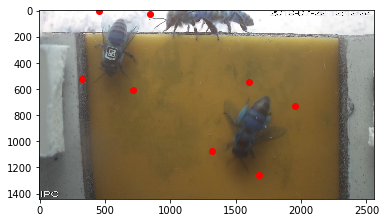

In [17]:

plt.imshow(img)
for annot in file['annotations']:
    print(annot['image_id'])
    if annot['image_id']==14880:
        kp= annot['bbox']
        for i in range(0,len(kp)-1,2):
            plt.plot(kp[i],kp[i+1],'ro')

# total = 0
for ann in annotations['annotations']:
    if ann['']

NameError: name 'annotations' is not defined

In [112]:
annotations['categories'].append({'name': 'bee_tag',
  'super_category': 'bee',
  'id': 3,
  'keypoints': ['head',
   'thorax',
   'tail',
   'antL',
   'antR',
   'pollenL',
   'pollenR',
   'tag'],
  'skeleton': [[0, 1], [2, 1], [2, 0], [0, 3], [0, 4], [3, 5]]})

In [116]:
annotations['images'][0]

{'filename': '000000000001.jpg', 'id': 1, 'height': 1440, 'width': 2560}

In [113]:
for img in annotations['images']:
    img['width']=2560
    img['height']=1440
    
for annot in annotations['annotations']:
    
    bbox = annot['keypoints']
    if bbox[17]>0:
        annot['category_id']=2
    if bbox[23]>0:
        annot['category_id']=3
    x= bbox[3]-50 #min([bbox[i] for i in range(0,len(bbox),3)])
    y= bbox[4]-50#min([bbox[i+1] for i in range(0,len(bbox),3)])
    width = img['width']
    height = img['height']
    w=100
    h=100
    if x+w>width:
        print(w+x)
    if y+h>height:
        h=(y+h)-height-1
    if w<=0:
        w=1
    if h<=0:
        h=1
    annot['bbox'] = [x,y,w,h]

In [130]:

output_file =os.path.join('bee_annotations_bbox_thorax_multiclass.json')
save(output_file,annotations)

In [114]:
annotations['images'][0]

{'filename': '000000000001.jpg', 'id': 1, 'height': 1440, 'width': 2560}

In [98]:
len(annotations['annotations'])

3228

In [99]:
from matplotlib.patches import Rectangle

In [117]:
img

{'filename': '000000000002.jpg', 'id': 2, 'height': 1440, 'width': 2560}

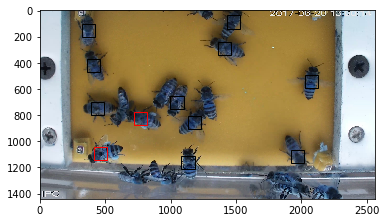

In [129]:
images_folder = 'BEES/Tag_Pollen/raw'
for img in annotations['images'][1:2]:
    file = os.path.join(images_folder,img['filename'])
    width = img['width']
    height = img['height']
    im = cv2.imread(file)
    idm = img['id']
    plt.imshow(im)
    
    for ann in annotations['annotations']:
        col='black'
        if ann['image_id']==idm:
            x,y,w,h = ann['bbox']
            if ann['category_id']==2:
                col='red'
            if ann['category_id']==3:
                col='lime'
            rect= Rectangle((x,y),w,h,fill=False,color=col)
            plt.gca().add_patch(rect)
    break

In [121]:
file

'raw/000000000002.jpg'

In [125]:
im = cv2.imread('training/000000000002.jpg')

In [3]:
!pwd

/home/irodriguez/JANELIA/src/keras_openpose_bee/dataset
